In [411]:
%run custom_imports.py

In [412]:
df= pd.read_csv('jm1.csv')

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

random_seed = 0

In [413]:
df.head(5)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [414]:
def custom_preprocessing(data):

    column_name = 'problems'

    if column_name in data.columns:
        data = data.rename(columns={'column_name': 'defects'})

    data['defects'] = data['defects'].astype('str')
    
    data = data.replace("False", '0', regex=True)
    data = data.replace("True", '1', regex=True)

    data = data.replace("no", '0', regex=True)
    data = data.replace("yes", '1', regex=True)

    data['defects'] = data['defects'].astype('float64')

    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

    return data

In [415]:
def class_balance(df):
    
    list_class = df['defects'].value_counts()

    total = sum(list_class)

    a = list_class[0]/total *100

    b = list_class[1]/total * 100

    if a>b:
        majority = a
        minority = b
    elif b>a:
        majority = b
        minority = a

    specs = (majority,minority)

    print('\nMajority class is {:.3f} and Minority class is {:.3f}\n'.format(majority, minority))

    major, minor = specs

    imbalance_group = 0

    if minor<5:
        imbalance_group = 3
    elif minor>=5 and minor<=20:
        imbalance_group = 2
    elif minor>20 and minor<=40:
        imbalance_group = 1

In [416]:
# Define a function to convert non-numeric values to zero
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return 0

In [417]:
df = custom_preprocessing(df)

In [418]:
class_balance(df)


Majority class is 80.652 and Minority class is 19.348



In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [420]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(convert_to_numeric)

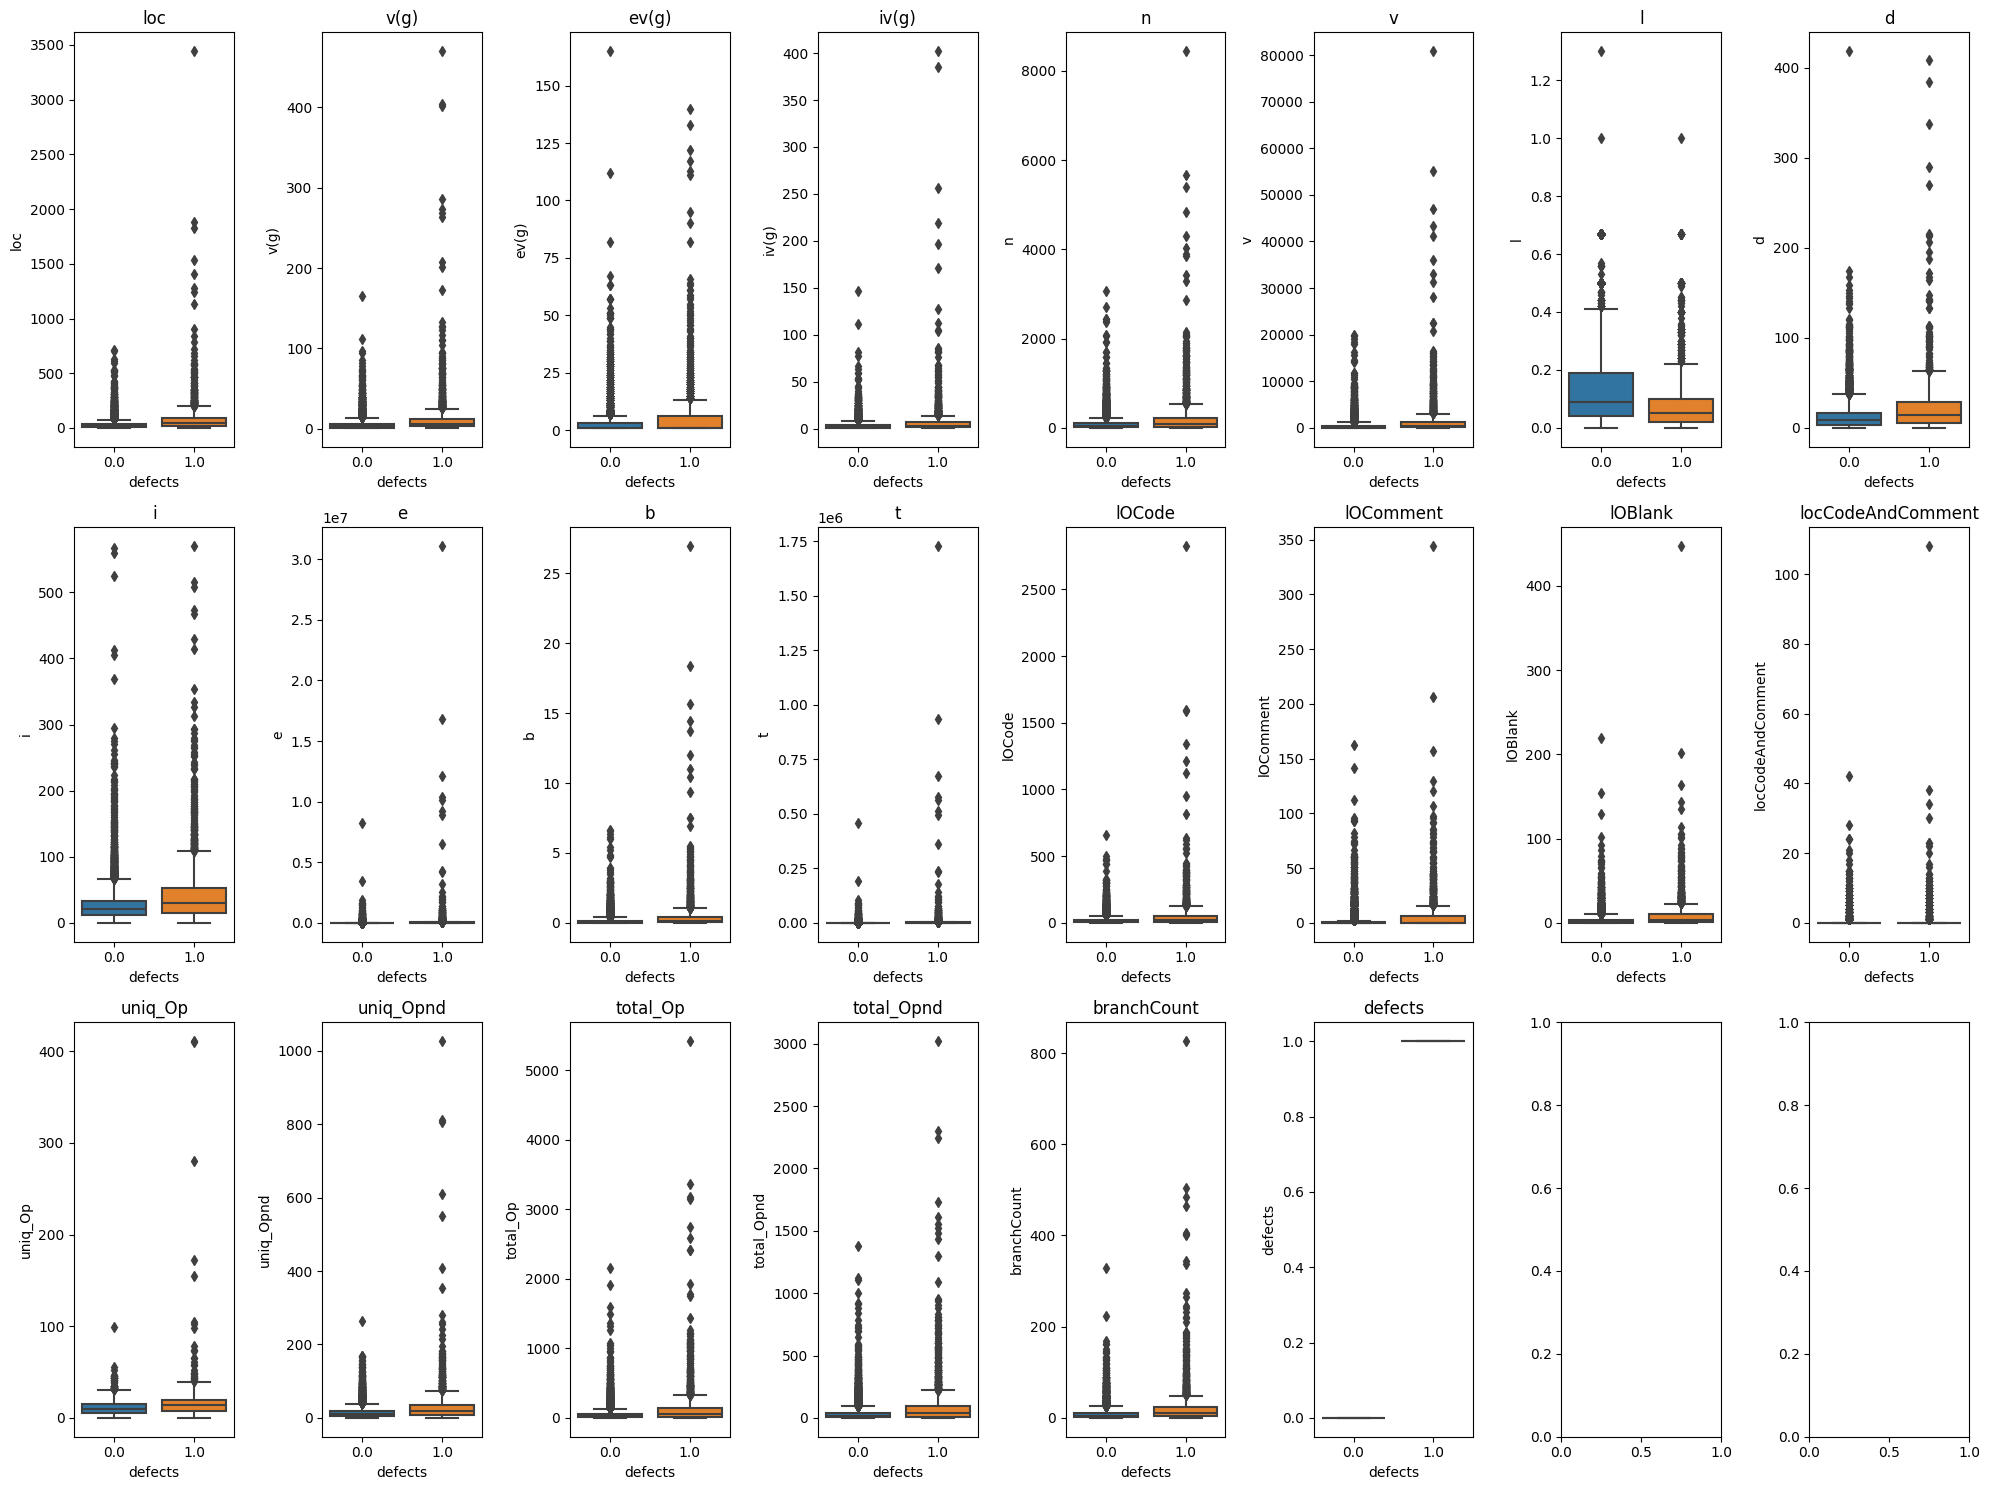

In [421]:
# Create subplots
fig, axes = plt.subplots(3, 8, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop over the y_variables list and create boxplots
for i, y_variable in enumerate(df.columns):
    row = i // 10
    col = i % 10
    sns.boxplot(x="defects",y=y_variable, data=df, ax=axes[i])
    axes[i].set_title(y_variable)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [422]:
X = df.drop(['defects'],axis=1)
y = df['defects']

In [423]:
X_train, X_holdout, y_train,y_holdout = train_test_split(X,y,test_size=0.3,random_state=42)

In [424]:
X_train.shape

(7619, 21)

# Principal Component Analysis - Robust

In [425]:
feature_names = X_train.columns

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

robpca = rpca.RobustPCA(lmb=4e-3, max_iter=100)

L, S = robpca.fit(X_scaled)



In [426]:
feature_importance = np.linalg.norm(L, axis=0)

# Rank features based on importance scores
sorted_indices = np.argsort(feature_importance)[::-1]

threshold = feature_importance.mean()

# Select top features based on threshold
selected_features = sorted_indices[feature_importance[sorted_indices] > threshold]

selected_features = [feature_names[idx] for idx in selected_features]

# Print selected feature indices or names
print("Selected Features:", selected_features)



Selected Features: ['n', 'total_Opnd', 'total_Op', 'v', 'b', 'lOCode', 'loc', 'd', 'uniq_Opnd', 'branchCount', 'lOBlank', 'lOComment', 'v(g)']


In [427]:
reduced_df = X_train[selected_features]

Post Robust PCA, Reconstruction Error =  362447.8110496896


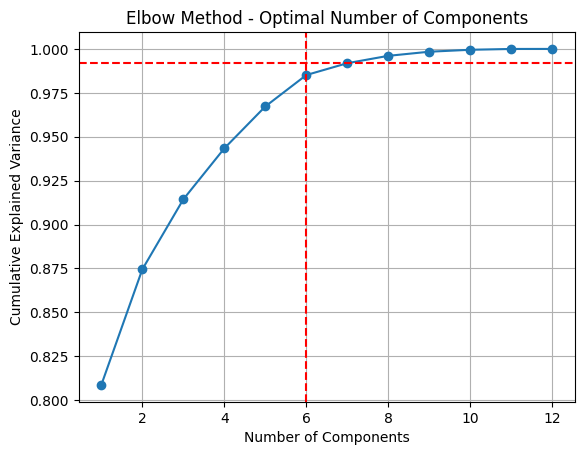

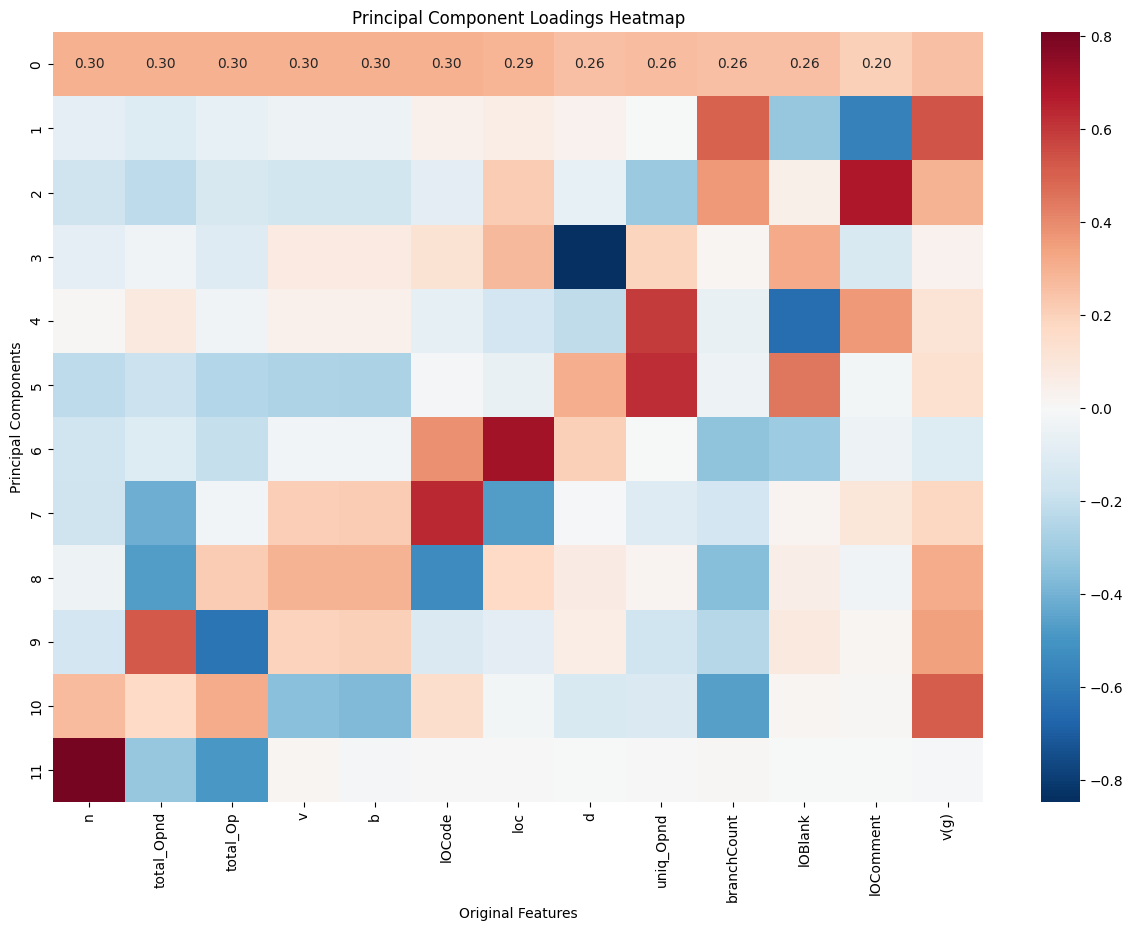

Combined Feature Ranking across all Components:
Index(['lOComment', 'd', 'lOBlank', 'uniq_Opnd', 'n', 'lOCode', 'v', 'loc',
       'total_Op', 'b', 'branchCount', 'v(g)', 'total_Opnd'],
      dtype='object')




In [428]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(reduced_df)

pca = PCA(n_components='mle')

pca.fit(X_scaled)

X_transformed = pca.transform(X_scaled)

X_recon = pca.inverse_transform(X_transformed)

mse = mean_squared_error(reduced_df,X_recon)

print("Post Robust PCA, Reconstruction Error = ",mse)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
num_components = len(pca.explained_variance_ratio_)
components = np.arange(1, num_components + 1)
plt.plot(components, cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method - Optimal Number of Components')
plt.grid(True)

diff = np.diff(cumulative_explained_variance)
elbow_x = np.where(diff <= 0.005)[0][0]
elbow_y = cumulative_explained_variance[elbow_x]

plt.axhline(y=elbow_y,color='r',linestyle='--')
plt.axvline(x=elbow_x,color='r',linestyle='--')

plt.show()

n_features = reduced_df.shape[1]
n_samples = reduced_df.shape[0]

# Get principal component loadings (coefficients)
pc_loadings = pca.components_

# Create a DataFrame for the heatmap
loadings_df = pd.DataFrame(pc_loadings, columns=reduced_df.columns)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(loadings_df, cmap='RdBu_r', center=0, annot=True, fmt=".2f")
plt.title('Principal Component Loadings Heatmap')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

feature_ranking = loadings_df.abs().rank(ascending=True, axis=1)

feature_names = reduced_df.columns

# Map indices to feature names and print ranked features for each component
for component_num in range(n_features):
    feature_rankings = feature_ranking.iloc[:, component_num]
    features_sorted_by_rank = feature_rankings.sort_values(ascending=True).index
    ranked_features_with_names = [feature_names[i] for i in features_sorted_by_rank]


# Calculate the average rank for each feature across all components
average_ranks = feature_ranking.mean()

# Sort features based on average ranks
sorted_features = average_ranks.sort_values(ascending=True).index

print("Combined Feature Ranking across all Components:")
print(sorted_features)
print("\n")

selected_loadings = loadings_df.iloc[:elbow_x, :]
selected_features = selected_loadings.idxmax(axis=1)

# Create the reduced dataset by selecting chosen principal components
reduced_dataset = X_transformed[:, :elbow_x]

In [429]:
loadings_df.to_csv('RPCA_PCAL.csv')

In [430]:
print('selected features : \n',selected_features)

selected_features = list(set(selected_features))


selected features : 
 0            v
1         v(g)
2    lOComment
3      lOBlank
4    uniq_Opnd
5    uniq_Opnd
dtype: object


In [431]:
with open('RobustPCA_features.pkl', 'wb') as file:
    pickle.dump(selected_features, file)

In [432]:
selected_features

['v(g)', 'uniq_Opnd', 'lOComment', 'lOBlank', 'v']

# Models

In [433]:
reduced_df = reduced_df[selected_features]

reduced_df = reduced_df.loc[:, ~reduced_df.columns.str.contains('^Unnamed')]

In [434]:
reduced_df

,v(g),uniq_Opnd,lOComment,lOBlank,v
613,2.0,5.0,0,0,48.43
4030,4.0,19.0,1,5,421.11
3582,1.0,0.0,0,0,0.00
6237,12.0,0.0,0,0,0.00
1430,4.0,41.0,1,5,1192.08
...,...,...,...,...,...
5734,2.0,5.0,0,0,83.76
5191,1.0,1.0,0,0,8.00
5390,12.0,29.0,0,2,684.99
860,1.0,0.0,0,0,0.00


Decision Tree

In [435]:
print("Decision Tree:")

model_dt = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

model_dt.fit(reduced_df, y_train)

dump(model_dt,'model_dt.pkl')

scores = cross_val_score(model_dt, reduced_df, y_train, cv=10, scoring='accuracy')
print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'.format(np.mean(scores), np.std(scores)))

# Make predictions on the training data
y_train_pred_prob = model_dt.predict_proba(reduced_df)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

print("roc_auc",roc_auc)


Decision Tree:


Mean cross-validation accuracy is 0.753 with SD 0.014
roc_auc 0.9915303324966611


AdaBoost Classifier

In [436]:
print("AdaBoost Classifier:")

adaboosted_clf = AdaBoostClassifier(estimator=model_dt,
                                    n_estimators=25,
                                    learning_rate=0.001,
                                    algorithm='SAMME.R',
                                    random_state=random_seed)

adaboosted_clf.fit(reduced_df,y_train)

scores = cross_val_score(adaboosted_clf, reduced_df, y_train, cv=10, scoring='accuracy',n_jobs=-1)
print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'.format(np.mean(scores), np.std(scores)))

# Make predictions on the training data
y_train_pred_prob = adaboosted_clf.predict_proba(reduced_df)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

print("roc_auc",roc_auc)


AdaBoost Classifier:
Mean cross-validation accuracy is 0.756 with SD 0.016
roc_auc 0.9915303324966611


Bagging Classifier

In [437]:
print("Bagging Classifier:")

bagged_clf = BaggingClassifier(estimator=model_dt,
                               n_estimators=50,
                               random_state=random_seed,
                               max_samples=0.001,
                               max_features=0.8,
                               bootstrap=True,
                               oob_score=True,
                               warm_start=False)

bagged_clf.fit(reduced_df,y_train)

scores = cross_val_score(bagged_clf, reduced_df, y_train, cv=10, scoring='accuracy',n_jobs=-1)
print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'.format(np.mean(scores), np.std(scores)))

# Make predictions on the training data
y_train_pred_prob = bagged_clf.predict_proba(reduced_df)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

print("roc_auc",roc_auc)

Bagging Classifier:
Mean cross-validation accuracy is 0.810 with SD 0.002
roc_auc 0.6915014152032309


Stacked Generalization

In [438]:
print("Stacked Generalization:")

estimators = [("model_ada", adaboosted_clf),
              ("model_bagged",bagged_clf)]

stacked_clf = StackingClassifier(estimators=estimators)

stacked_clf.fit(reduced_df,y_train)

with open('stacked_clf.pkl', 'wb') as f:
  pickle.dump(stacked_clf, f)

scores = cross_val_score(stacked_clf, reduced_df, y_train, cv=10, scoring='accuracy',n_jobs=-1)
print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'.format(np.mean(scores), np.std(scores)))

# Make predictions on the training data
y_train_pred_prob = stacked_clf.predict_proba(reduced_df)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)

print("roc_auc",roc_auc)

Stacked Generalization:
Mean cross-validation accuracy is 0.810 with SD 0.006
roc_auc 0.8676872186451776


In [439]:
df_test = pd.read_csv('pc1.csv')

STACKED CLASSIFIER
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      8779
         1.0       0.68      0.19      0.30      2106

    accuracy                           0.83     10885
   macro avg       0.76      0.59      0.60     10885
weighted avg       0.80      0.83      0.78     10885

Precision-Recall-AUC : 0.3213860784921878


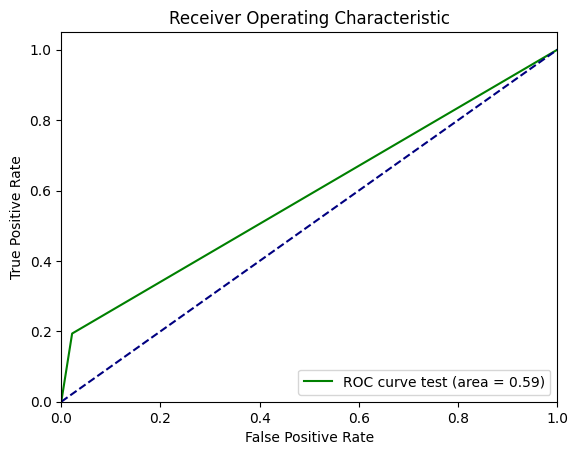

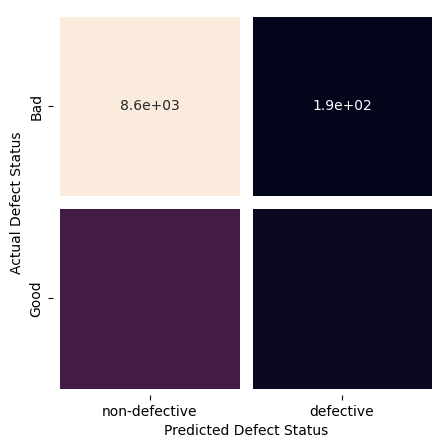

In [440]:
with open('RobustPCA_features.pkl','rb') as file:
    selected_features = pickle.load(file)


X_test = df.drop(['defects'],axis=1)

X_test = X_test[selected_features]

y_test = df['defects']

print("STACKED CLASSIFIER")

predictions = stacked_clf.predict(X_test)

print(classification_report(y_test,predictions))

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictions)
# Calculate AUC (Area Under the ROC Curve)
roc_auc1 = auc(fpr1, tpr1)
#calculate precision, recall and threshold
precision, recall, threshold_2 = precision_recall_curve(y_test, predictions)
# Calculate AUC (Area Under the PR Curve)
pr_auc = auc(precision, recall)

print("Precision-Recall-AUC :",pr_auc)

# Plot ROC curve
# plt.figure()
plt.plot(fpr1, tpr1, color='green', label='ROC curve test (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm,annot=True, xticklabels=['non-defective', 'defective'], cbar=False,
yticklabels=['Bad', 'Good'], square=True,
linewidths=8.0) # plots the confusion matrix
ax.set_xlabel('Predicted Defect Status')
ax.set_ylabel('Actual Defect Status')
plt.show()

In [441]:
X_test = np.array(X_test)

X_test[0].reshape(1,-1)

array([[1.4, 1.2, 2. , 2. , 1.3]])

In [442]:
result = stacked_clf.predict((X_test[102].reshape(1,-1)))

In [443]:
result

array([1.])